## SARIMAX time series analysis to forecast prices from historical data
https://medium.com/codex/forecasting-gamestop-stock-price-using-time-series-analysis-794e20b1236d

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Date
2016-08-29     22.736064
2016-08-30     22.846780
2016-08-31     22.522546
2016-09-01     22.514635
2016-09-02     22.309024
                 ...    
2022-05-23     96.570000
2022-05-24     94.050003
2022-05-25     90.139999
2022-05-26    116.000000
2022-05-27    141.000000
Name: Open, Length: 1448, dtype: float64


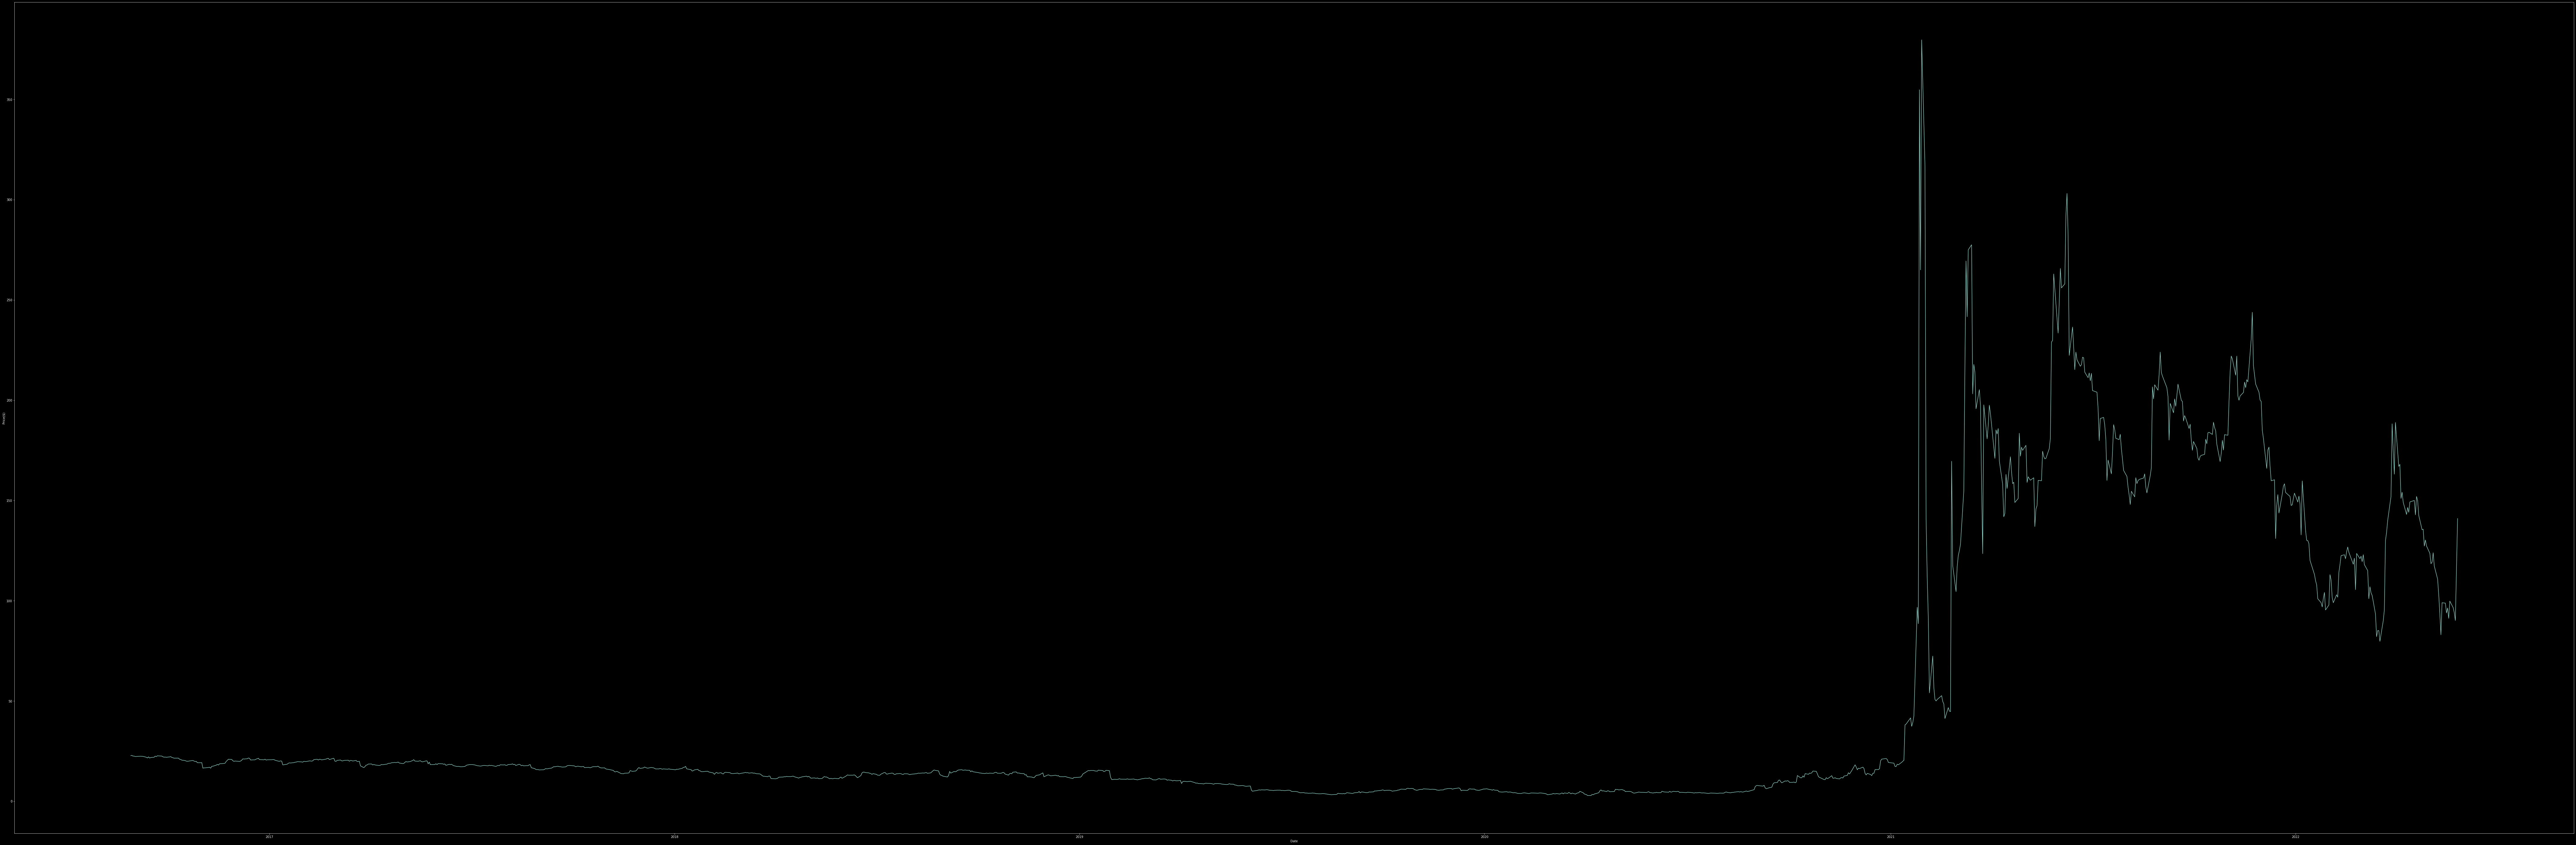

In [13]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# function getting data for the last x years with x weeks space 
# from checking data and specific observation.
def stock_data(ticker, period, interval, observation):
    ticker = yf.Ticker(ticker)
    ticker_history = ticker.history(period, interval)
    print((ticker_history[observation])) 

    sf = ticker_history[observation]
    df = pd.DataFrame({'Date':sf.index, 'Values':sf.values})

    x = df['Date'].tolist()
    y = df['Values'].tolist()

    plt.style.use('dark_background')
    plt.figure(figsize=(150,50))
    plt.plot(x,y)
    plt.ylabel('Price($)')
    plt.xlabel('Date', rotation=0)
    plt.show()

if __name__ == '__main__':
    stock_data('GME', '69mo', '1d', 'Open')


In [20]:
import yfinance as yf

# make API call
gme_df = yf.download('GME', start='2017-01-01', end='2021-12-31', progress=False)

# rename columns
gme_df.columns = ['open','high','low','close','adj close','volume']

# set up 12-period MA and EMA display
df_ma = gme_df.close.rolling(12).mean()
df_sma = gme_df.close.ewm(span=12).mean()

# set up volume bars (green/red)
gme_df['change'] = gme_df.close.diff(1)
gme_df['volume_up'] = np.where(gme_df.change < 0, gme_df.volume, np.nan)
gme_df['volume_down'] = np.where(gme_df.change >= 0, gme_df.volume, np.nan)

# pull out relevant series
close = gme_df.close
volume = gme_df.volume

In [21]:
gme_df['Date'] = gme_df.index
# gme_df['Date'] = pd.to_datetime(gme_df['Date'], format='%y%m%d')

In [22]:
gme_df

,open,high,low,close,adj close,volume,change,volume_up,volume_down,Date
Date,,,,,,,,,,
2017-01-03,25.440001,25.469999,25.020000,25.370001,20.631746,1941400,NaN,NaN,NaN,2017-01-03
2017-01-04,25.580000,26.049999,25.580000,25.920000,21.079021,2244300,0.549999,NaN,2244300.0,2017-01-04
2017-01-05,25.559999,25.559999,24.900000,25.000000,20.330847,3037700,-0.920000,3037700.0,NaN,2017-01-05
2017-01-06,25.150000,25.170000,24.500000,24.520000,19.940496,2333600,-0.480000,2333600.0,NaN,2017-01-06
2017-01-09,24.600000,24.660000,24.330000,24.490000,19.916098,1646700,-0.030001,1646700.0,NaN,2017-01-09
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,154.000000,155.000000,146.020004,152.139999,152.139999,1055500,-1.860001,1055500.0,NaN,2021-12-23
2021-12-27,152.000000,152.619995,140.000000,148.309998,148.309998,1613600,-3.830002,1613600.0,NaN,2021-12-27
2021-12-28,147.500000,157.410004,146.410004,146.460007,146.460007,1331100,-1.849991,1331100.0,NaN,2021-12-28


In [23]:
gme_df.head()

,open,high,low,close,adj close,volume,change,volume_up,volume_down,Date
Date,,,,,,,,,,
2017-01-03,25.440001,25.469999,25.02,25.370001,20.631746,1941400,NaN,NaN,NaN,2017-01-03
2017-01-04,25.580000,26.049999,25.58,25.920000,21.079021,2244300,0.549999,NaN,2244300.0,2017-01-04
2017-01-05,25.559999,25.559999,24.90,25.000000,20.330847,3037700,-0.920000,3037700.0,NaN,2017-01-05
2017-01-06,25.150000,25.170000,24.50,24.520000,19.940496,2333600,-0.480000,2333600.0,NaN,2017-01-06
2017-01-09,24.600000,24.660000,24.33,24.490000,19.916098,1646700,-0.030001,1646700.0,NaN,2017-01-09


In [24]:
gme_df.describe()

,open,high,low,close,adj close,volume,change,volume_up,volume_down
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1257.000000,6.350000e+02,6.220000e+02
mean,44.350191,46.732083,42.006359,44.086884,43.106109,6.681191e+06,0.103389,5.523321e+06,7.870880e+06
std,68.929061,73.721307,64.234728,68.109448,68.469092,1.418884e+07,11.439504,8.340214e+06,1.826661e+07
min,2.850000,2.940000,2.570000,2.800000,2.800000,8.182000e+05,-153.910004,9.280000e+05,8.182000e+05
25%,6.650000,6.962500,6.285000,6.680000,6.680000,2.253550e+06,-0.259999,2.263750e+06,2.243400e+06
50%,15.185000,15.460000,14.860000,15.215000,13.971846,3.343250e+06,-0.010000,3.277300e+06,3.396550e+06
75%,23.380000,23.660000,22.947501,23.385000,19.460515,5.642850e+06,0.259999,5.228750e+06,5.878825e+06
max,379.709991,483.000000,291.510010,347.510010,347.510010,1.971579e+08,199.530014,9.219420e+07,1.971579e+08


In [25]:
gme_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   open         1258 non-null   float64       
 1   high         1258 non-null   float64       
 2   low          1258 non-null   float64       
 3   close        1258 non-null   float64       
 4   adj close    1258 non-null   float64       
 5   volume       1258 non-null   int64         
 6   change       1257 non-null   float64       
 7   volume_up    635 non-null    float64       
 8   volume_down  622 non-null    float64       
 9   Date         1258 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 108.1 KB


In [ ]:
gme_df.dtypes

In [ ]:
gme_df['date']

In [26]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(close, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
    'p-value', '#Lags Used',
    'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -1.005835
p-value                           0.751130
#Lags Used                       16.000000
Number of Observations Used    1241.000000
Critical Value (1%)              -3.435630
Critical Value (5%)              -2.863872
Critical Value (10%)             -2.568011
dtype: float64


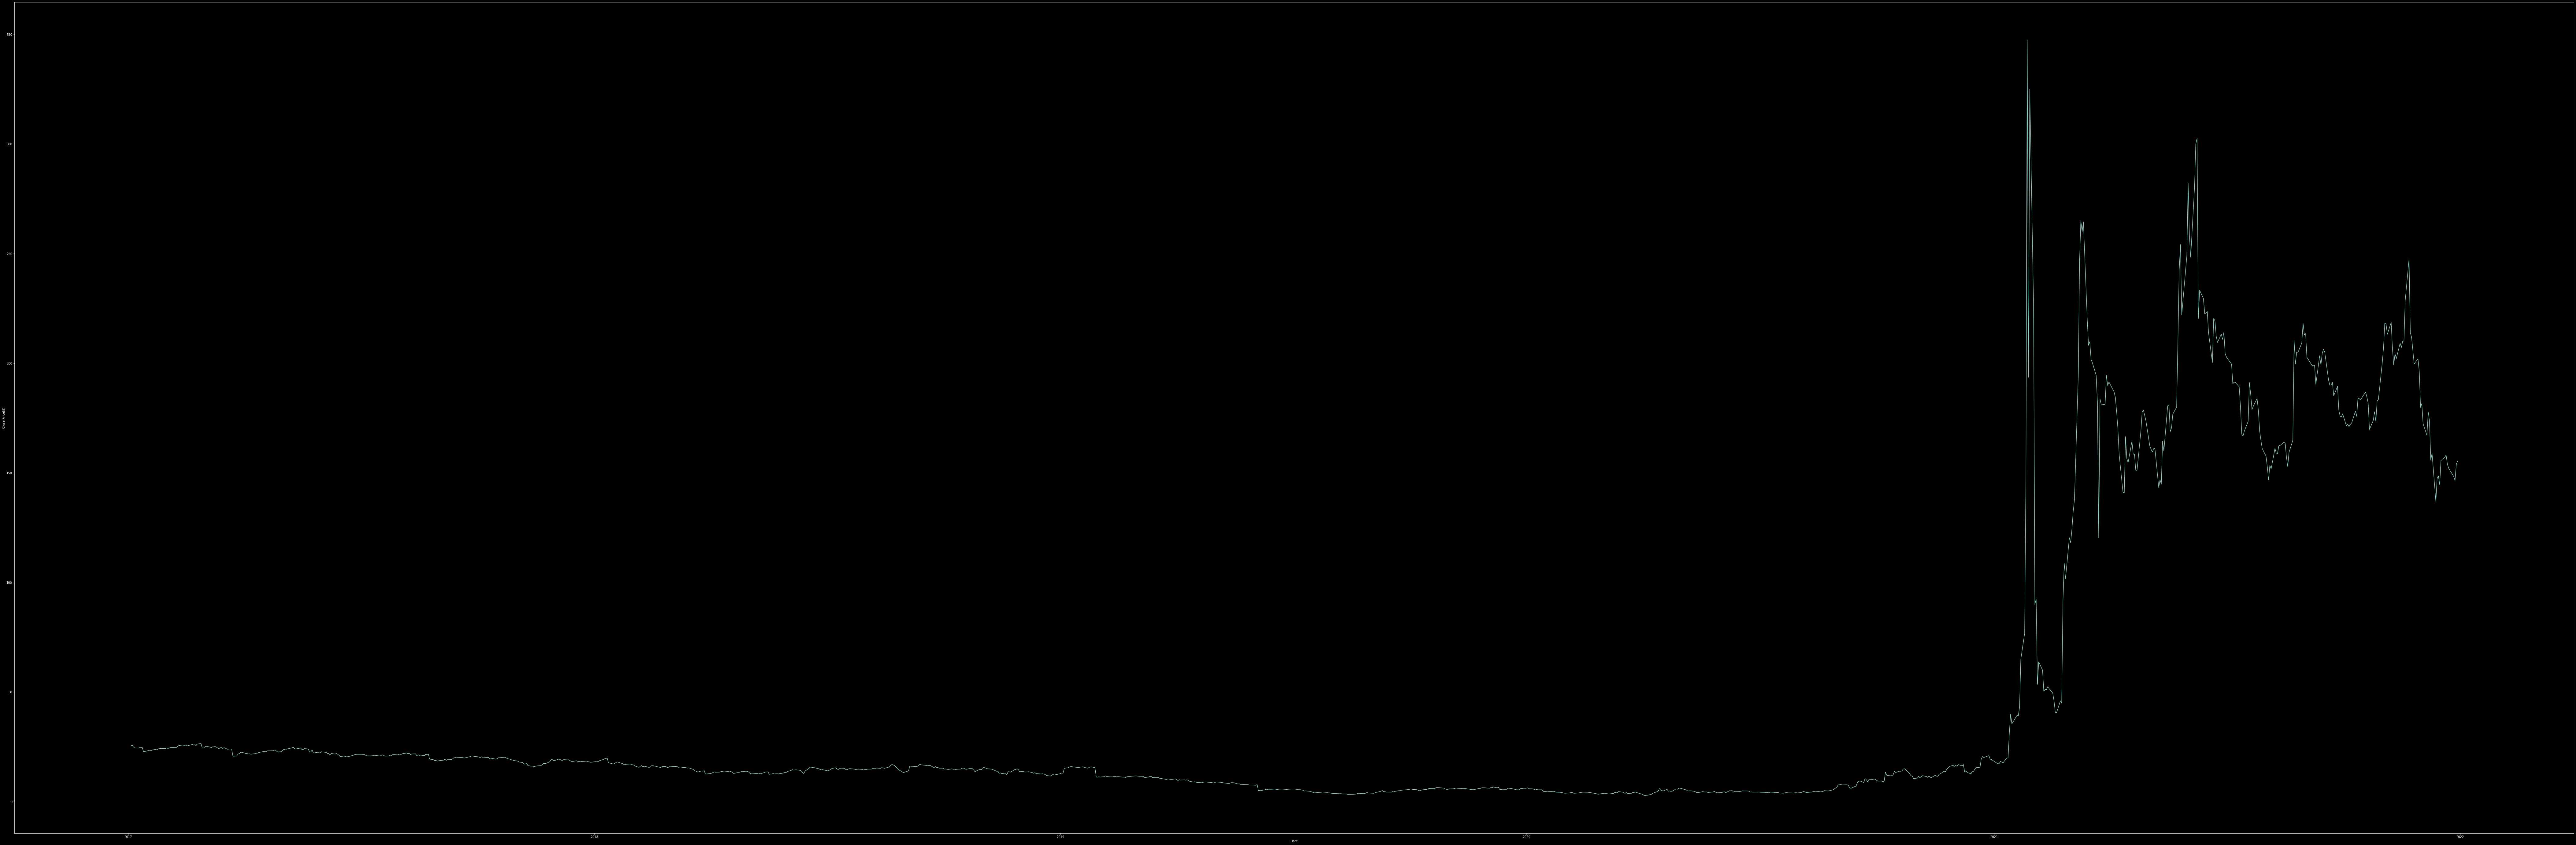

In [28]:
x = gme_df['Date'].tolist()
y = gme_df['close'].tolist()
plt.style.use('dark_background')
plt.figure(figsize=(150,50))
plt.plot(x,y)
plt.ylabel('Close Price($)')
plt.xlabel('Date', rotation=0)
plt.show()

https://notebooks.githubusercontent.com/view/ipynb?color_mode=auto&commit=32b73be6094ac5a733edbd99845d967a0ec8e68b&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f676973742f64776869746e6579636d752f66653861353865343835323564653639633163382f7261772f333262373362653630393461633561373333656462643939383435643936376130656338653638622f41737369676e6d656e74253230352e6970796e62&logged_in=false&nwo=dwhitneycmu%2Ffe8a58e48525de69c1c8&path=Assignment+5.ipynb&repository_id=33136173&repository_type=Gist

https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

Must check, has Auto ARIMA method for time series forcasting

ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

- p (past values used for forecasting the next value)
- q (past forecast errors used to predict the future values)
- d (order of differencing)

In [34]:
from pyramid.arima import auto_arima

data = gme_df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

ModuleNotFoundError: No module named 'pyramid.arima'

In [36]:
from statsmodels.tsa.arima_model import ARIMA
# 1,1,1 ARIMA Model
model = ARIMA(gme_df, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
